<a href="https://colab.research.google.com/github/wujinja-cgu/Support-Vector-Machine/blob/main/3d_Plotting_using_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Three-dimensional plotting using matplotlib
There are many options for doing 3D plots in Python, but here are some common and easy ways using Matplotlib.

In general, the first step is to create a 3D axes, and then plot any of the 3D graphs that best illustrates the data for a particular need. In order to use Matplotlib, the mplot3d toolkit that is included with the Matplotlib installation has to be imported:

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

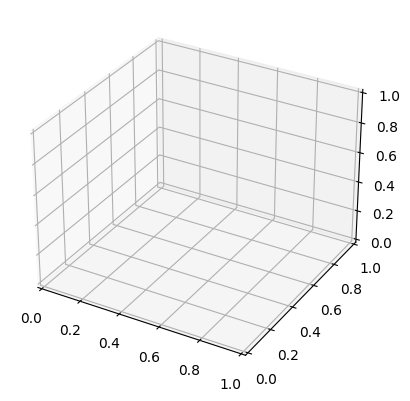

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

It is inside this 3D axes that a plot can be drawn, it is important to know what type of plot (or combination of plots) will be better to describe the data.

At this point in time, you need to note that this comprises our base for further plotting.

###Points and Lines:

The following image combines 2 plots, one with a line that goes through every point of the data, and others that draw a point on each of the particular 1000 values on this example.

The code is actually very simple when you try to analyze it. We have made use of standard trigonometric functions to plot a set of random values to obtain our projection in 3 dimensions.

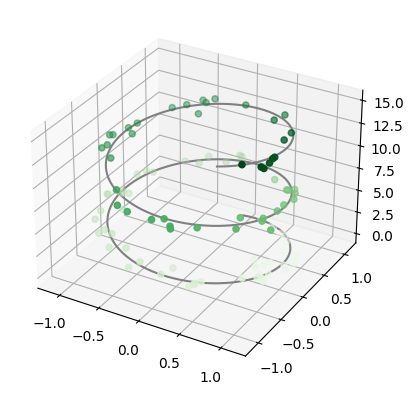

In [ ]:
ax = plt.axes(projection='3d')# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

###3D Contour Plots:

The input for the contour plot is a bit different than for the previous plot, as it needs the data on a two-dimensional grid.

Note that on the following example that after assigning values for x and y, they are combined on a grid by executing “np.meshgrid(x, y)” and then the Z values are created from executing the function f(X,Y) with the values of the grid (Z=f(X,Y)).

Again, basic 3d plot simplified in the following code:

Text(0.5, 0, 'z')

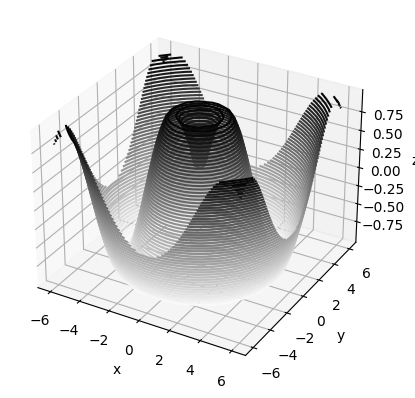

In [ ]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

On the previous graphs, the data was generated in order, but in real life sometimes the data is not ordered, for those cases, surface triangulation is very useful as it creates surfaces by finding sets of triangles formed between adjacent points.

###Surface Triangulation

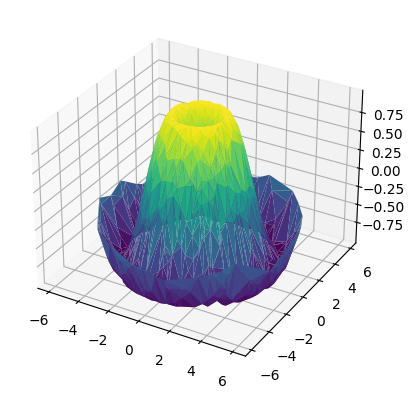

In [ ]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,cmap='viridis', edgecolor='none')

In [2]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

In [5]:
import pandas as pd
url='https://raw.githubusercontent.com/wujinja-cgu/Support-Vector-Machine/main/sepsis%20data.csv?token=GHSAT0AAAAAACFZ43EWRENVDMPXPVZVLK3OZHGYJKA'
sepsis = pd.read_csv(url)
print(sepsis.head(30))
X = sepsis.data[:, :3]  # we only take the first three features.
Y = sepsis.death

HTTPError: ignored

In [ ]:
#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()